In [18]:
import pandas_datareader.data as pdr
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [4]:
pltr = pdr.DataReader('PLTR', 'yahoo', start='2020-09-30', end=date.today().strftime("%Y-%m-%d"))
pltr['Mean'] = (pltr['High'] + pltr['Low'])/2

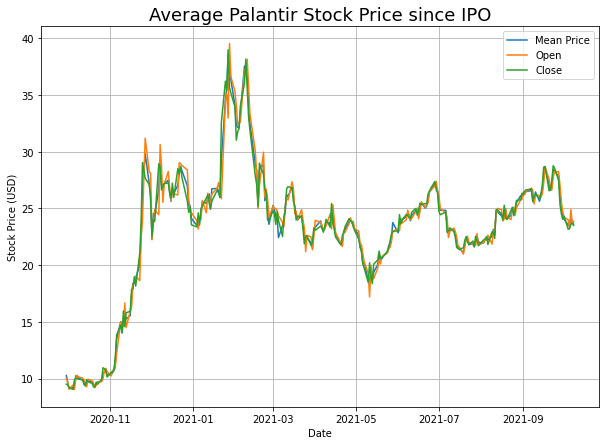

In [5]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(pltr['Mean'], label = 'Mean Price')
ax.plot(pltr['Open'], label = 'Open')
ax.plot(pltr['Close'], label = 'Close')

plt.xlabel('Date')
plt.ylabel('Stock Price (USD)') 
plt.title('Average Palantir Stock Price since IPO', fontsize = 18)
ax.grid()
ax.legend()

plt.show()

In [16]:
pltr_mean = np.array(pltr['Mean']).reshape(-1,1)
min_max_scaler = MinMaxScaler(feature_range=(0,1))
pltr_scaled = min_max_scaler.fit_transform(pltr_mean)

In [29]:
X_data, y_data = [] , []
for i in range(50, len(pltr_scaled)):
    X_data.append(pltr_scaled[i-50:i, 0])
    y_data.append(pltr_scaled[i, 0])

In [38]:
len(X_data)

209

In [46]:
X_train, X_test = np.array(X_data[0:round(0.8*len(X_data))]), np.array(X_data[round(0.8*len(X_data)):len(X_data)])
y_train, y_test = np.array(y_data[0:round(0.8*len(y_data))]), np.array(y_data[round(0.8*len(y_data)):len(y_data)])

In [48]:
y_train.shape

(167,)